In [1]:
# import pandas as pd
# file_path = './dataset/users.csv'
# df = pd.read_csv(file_path, nrows=10000)
# new_file_path = './dataset/users_DEMO.csv'
# df.to_csv(new_file_path, index=False)

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import missingno as msno

In [15]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} B'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} B'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [16]:
recommendations = reduce_mem_usage(pd.read_csv('./dataset/recommendations.csv'))
users = reduce_mem_usage(pd.read_csv('./dataset/users.csv'))
games = pd.read_csv('./dataset/games.csv')
games.head(50)

Memory usage of dataframe is 2186183885.00 B
Memory usage after optimization is: 920666280.00 B
Decreased by 57.9%
Memory usage of dataframe is 330882800.00 B
Memory usage after optimization is: 110294352.00 B
Decreased by 66.7%


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [17]:
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38354101 entries, 0 to 38354100
Data columns (total 8 columns):
 #   Column          Dtype   
---  ------          -----   
 0   app_id          int32   
 1   helpful         int32   
 2   funny           int16   
 3   date            category
 4   is_recommended  float16 
 5   hours           float16 
 6   user_id         int32   
 7   review_id       int32   
dtypes: category(1), float16(2), int16(1), int32(4)
memory usage: 878.0 MB


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13786778 entries, 0 to 13786777
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int32
 1   products  int16
 2   reviews   int16
dtypes: int16(2), int32(1)
memory usage: 105.2 MB


In [19]:
recommendations.describe()

,app_id,helpful,funny,is_recommended,hours,user_id,review_id
count,3.835410e+07,3.835410e+07,3.835410e+07,38354101.0,3.835410e+07,3.835410e+07,3.835410e+07
mean,5.984360e+05,3.291471e+00,1.089531e+00,NaN,NaN,7.174218e+06,1.917705e+07
std,4.699511e+05,4.825269e+01,2.949939e+01,0.0,NaN,3.869890e+06,1.107188e+07
min,1.000000e+01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.524900e+05,0.000000e+00,0.000000e+00,1.0,8.500000e+00,4.113430e+06,9.588525e+06
50%,4.338500e+05,0.000000e+00,0.000000e+00,1.0,2.940625e+01,7.266746e+06,1.917705e+07
75%,9.204900e+05,0.000000e+00,0.000000e+00,1.0,1.051250e+02,1.056852e+07,2.876558e+07
max,2.253290e+06,3.621200e+04,2.810900e+04,1.0,1.000000e+03,1.378678e+07,3.835410e+07


In [20]:
users.describe()

,user_id,products,reviews
count,1.378678e+07,1.378678e+07,1.378678e+07
mean,6.893388e+06,1.175048e+02,2.781948e+00
std,3.979900e+06,2.461478e+02,7.316853e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.446694e+06,2.300000e+01,1.000000e+00
50%,6.893388e+06,5.600000e+01,1.000000e+00
75%,1.034008e+07,1.280000e+02,3.000000e+00
max,1.378678e+07,3.221400e+04,5.306000e+03


In [21]:
recommendations_null = recommendations.isnull().sum()
users_null = users.isnull().sum()
print(recommendations_null)
print(users_null)

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64
user_id     0
products    0
reviews     0
dtype: int64


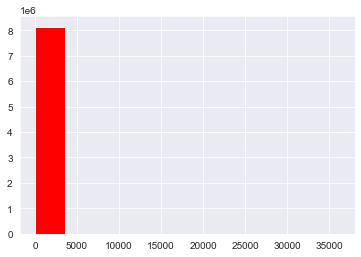

In [22]:
helpful = recommendations[recommendations['helpful']>0]
plt.hist(helpful['helpful'], 
orientation = 'vertical',
histtype = 'bar', color ='red')
plt.show()

In [23]:
recommendations['is_recommended'].replace(True,1,inplace=True)
recommendations['is_recommended'].replace(False,0,inplace=True)
recommendations.head(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,1.0,36.312500,49625,0
1,304390,4,0,2017-02-17,0.0,11.500000,2482,1
2,1085660,2,0,2019-11-17,1.0,336.500000,243409,2
3,703080,0,0,2022-09-23,1.0,27.406250,248701,3
4,526870,0,0,2021-01-10,1.0,7.898438,22902,4


In [24]:
rec_numeric_index = ['helpful',	'funny', 'hours', 'is_recommended']
recommendations_numeric = recommendations[rec_numeric_index]
recommendations_numeric['is_recommended'] = recommendations_numeric['is_recommended'].astype(int)
recommendations_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38354101 entries, 0 to 38354100
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   helpful         int32  
 1   funny           int16  
 2   hours           float16
 3   is_recommended  int32  
dtypes: float16(1), int16(1), int32(2)
memory usage: 438.9 MB


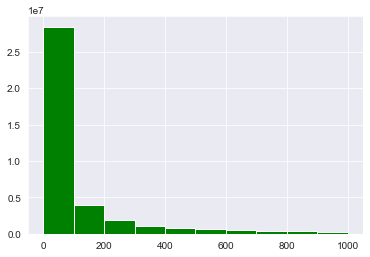

In [27]:
plt.hist(recommendations_numeric['hours'], 
orientation = 'vertical',
histtype = 'bar', color ='green')
plt.show()

<AxesSubplot:>

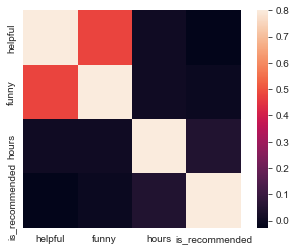

In [25]:
correlation = recommendations_numeric.corr()
sns.heatmap(correlation,square = True,  vmax=0.8)

In [26]:
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 8137937
Now column number is: 30216164
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: helpful, dtype: float64
Description of data larger than the upper bound is:
count    8.137937e+06
mean     1.551270e+01
std      1.038451e+02
min      2.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      8.000000e+00
max      3.621200e+04
Name: helpful, dtype: float64
Delete number is: 543349
Now column number is: 29672815
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: funny, dtype: float64
Description of data larger than the upper bound is:
count    543349.000000
mean          2.801258
std           2.137691
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max         373.000000
Name: funny, dtype: float64

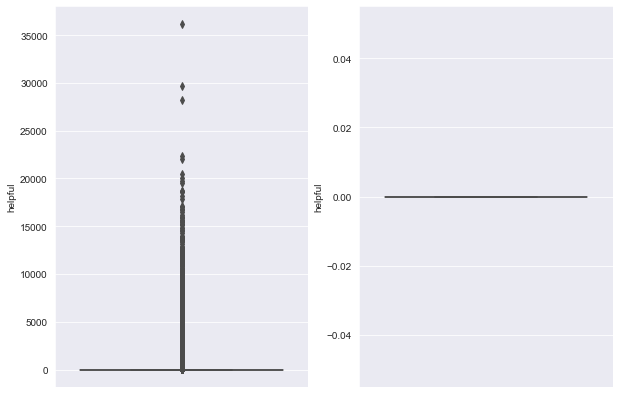

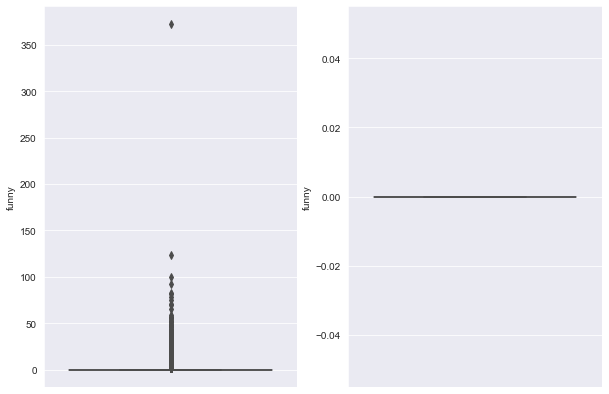

In [28]:
recommendations_numeric = outliers_proc(recommendations_numeric, 'helpful', scale=3)
recommendations_numeric = outliers_proc(recommendations_numeric, 'funny', scale=3)
# recommendations_numeric = outliers_proc(recommendations_numeric, 'hours', scale=3)

In [29]:
recommendations_numeric.describe()

,helpful,funny,hours,is_recommended
count,29672815.0,29672815.0,2.967282e+07,2.967282e+07
mean,0.0,0.0,NaN,9.002200e-01
std,0.0,0.0,NaN,2.997064e-01
min,0.0,0.0,0.000000e+00,0.000000e+00
25%,0.0,0.0,9.296875e+00,1.000000e+00
50%,0.0,0.0,3.050000e+01,1.000000e+00
75%,0.0,0.0,1.038750e+02,1.000000e+00
max,0.0,0.0,1.000000e+03,1.000000e+00
